In [1]:
%load_ext autoreload
%autoreload 2

# 0. Libraries

------------------

In [2]:
import sys
sys.path.append(r'C:\Users\Alex\git\EC-LHC\footprint\FFP_python_v1_4')
sys.path.append(r'C:\Users\Alex\git\Masters-EC-Article\source')
from calc_footprint_FFP_adjusted01 import FFP
from k15_to_raster import K15_to_raster
from initialize_analysis import InitializeAnalysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns
import scipy as sp
import datetime as dt
import scipy
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [4]:
import pathlib
from functools import reduce


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_regression

In [6]:
final_imgFolder = pathlib.Path(r"G:\Meu Drive\USP-Mestrado\Masters-Data\Imgs\Final")

# 1. Reading files

------------------

In [7]:
a = InitializeAnalysis(
    ep_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\EddyPro\2-Final-Fase01020304\EddyPro_Fase01020304",
    lf_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\Dados_Brutos\IAB3",
    iab1_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\Dados_Brutos\IAB1",
    iab2_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\Dados_Brutos\IAB2\IAB2",
    footprint_file=r"G:\Meu Drive\USP-Mestrado\Masters-Data\Footprint\classification_pixel_2018-10-05-00-30to2021-01-08-00-00_pf_80.csv",
    k15_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\Footprint\k15_process_data_v2",
    # lai_file_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\LAI\process_data\lai_reduced_k15_2020.csv",
    # # evi_file_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\evi_reduced_k15_2020.csv"
    # # evi_file_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\toa\evi_reduced_k15_2020.csv"
    # # evi_file_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\evi_reduced_k15_2020.csv"
    # evi_file_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\evi_reduced_mean_2020.csv"


)

Reading IAB3_EP files...
# IAB3_EP: 5	Inicio: 2018-10-05 00:30:00	Fim: 2021-01-08 00:00:00
Reading IAB3_LF files...
# IAB3_LF: 41	Inicio:2018-09-07 19:30:00	Fim: 2021-01-08 09:30:00
Reading IAB2 files...
# IAB2: 38	Inicio: 2017-02-03 09:20:00	Fim: 2021-01-22 11:30:00
Reading IAB1 files...
# IAB1: 12	Inicio: 2015-07-17 15:00:00	Fim: 2021-01-22 10:50:00
Reading Footprint file...
Inicio: 2018-10-05 00:30:00	Fim: 2021-01-08 00:00:00
Reading K15 files...
# K15: 24	Inicio: 2018-10-05 00:30:00	Fim: 2021-01-08 00:00:00
Duplicatas:  0
Verificacao de Duplicatas:  0
Duplicatas:  1
Verificacao de Duplicatas:  0
Duplicatas:  840479
Verificacao de Duplicatas:  0
Duplicatas:  507541
Verificacao de Duplicatas:  0


In [8]:
k15_evi_path = pathlib.Path(r'G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\V2\k15_evi')
evi_dfs = []
for i in k15_evi_path.rglob('*.csv'):
    print(i)
    evi_dfs.append(pd.read_csv(i))
evi_df = reduce(lambda left, right: pd.merge(left, right, on=['time']), evi_dfs)

column_evi = ['time','k15_evi','k15_evi_acc_n','k15_evi_rej_n','evi_radius_median','evi_radius_mean']
evi_df = evi_df[column_evi]
evi_df.rename(columns={'time':'TIMESTAMP'}, inplace=True)
evi_df['TIMESTAMP'] = pd.to_datetime(evi_df['TIMESTAMP'])

G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\V2\k15_evi\k15_evi_sum.csv
G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\V2\k15_evi\k15_evi_acc_n.csv
G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\V2\k15_evi\k15_evi_rej_n.csv
G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\V2\k15_evi\evi_radius_median.csv
G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\V2\k15_evi\evi_radius_mean.csv


C:\Users\Alex\AppData\Local\Temp\ipykernel_13296\2325117739.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  evi_df = reduce(lambda left, right: pd.merge(left, right, on=['time']), evi_dfs)


In [9]:
df = a.select_datetime(year=2020, begin_hour=7, end_hour=17)

In [10]:
df.columns

Index(['index_x', 'TIMESTAMP', 'date', 'time', 'H', 'qc_H', 'LE', 'qc_LE',
       'co2_flux', 'H_strg', 'LE_strg', 'sonic_temperature', 'air_temperature',
       'air_pressure', 'air_density', 'ET', 'e', 'es', 'RH', 'VPD', 'Tdew',
       'u_unrot', 'v_unrot', 'w_unrot', 'u_rot', 'v_rot', 'w_rot',
       'wind_speed', 'max_wind_speed', 'wind_dir', 'u*', '(z-d)/L', 'un_H',
       'H_scf', 'un_LE', 'LE_scf', 'u_var', 'v_var', 'w_var', 'ts_var',
       'index_y', 'CO2_sig_strgth_mean', 'H2O_sig_strgth_mean', 'Rn_Avg',
       'Rs_incoming_Avg', 'Rs_outgoing_Avg', 'Rl_incoming_Avg',
       'Rl_outgoing_Avg', 'Rl_incoming_meas_Avg', 'Rl_outgoing_meas_Avg',
       'shf_Avg(1)', 'shf_Avg(2)', 'precip_Tot', 'code03', 'code04', 'code09',
       'code12', 'code15', 'code19', 'code20', 'code24', 'code25', 'code33',
       'Unnamed: 0', 'datetime', 'k15_n', 'k15_filter_n', 'flag_qaqc',
       'flag_rain', 'flag_signalStr', 'footprint_acceptance', 'flag_footprint',
       'flag_k15', 'flag_basic', 'f

In [11]:
df_2 = a.iab2_df_resample

In [12]:
df_2.columns

Index(['TIMESTAMP', 'index', 'RECORD', 'PTemp_C_Avg', 'WS_ms_Avg', 'WindDir',
       'G_Wm2_Avg', 'AirTC_Avg', 'RH', 'AirTC_2_Avg', 'RH_2', 'NR_Wm2_Avg',
       'CNR_Wm2_Avg', 'Rain_mm_Tot', 'Cerrado_SF(1)', 'Cerrado_SF(2)',
       'Cerrado_SF(3)', 'Cerrado_SF(4)', 'Cerrado_SF(5)', 'Cerrado_WC(1)',
       'Cerrado_WC(2)', 'Cerrado_WC(3)', 'Cerrado_WC(4)', 'Cerrado_WC(5)',
       'BattV_Avg', 'Temp_C_Avg(1)', 'Temp_C_Avg(2)', 'Temp_C_Avg(3)',
       'Temp_C_Avg(4)', 'BattV_Min', 'Rain_mm_TOT_torre', 'Rain_mm_2_PI_Tot',
       'Rain_mm_3_LID_Tot', 'FullBR_LID1_Avg', 'FullBR_LID1',
       'FullBR_LID1_Std', 'Rain_mm_4_PI_Tot', 'Rain_mm_5_LID_Tot',
       'FullBR_LID2_Avg', 'FullBR_LID2', 'FullBR_LID2_Std', 'Rain_mm_6_EF_Tot',
       'Rain_mm_7_EF_Tot', 'Rain_mm_8_EF_Tot', 'Termopar_C'],
      dtype='object')

In [13]:
v = ['Cerrado_WC(1)','Cerrado_WC(2)', 'Cerrado_WC(3)', 'Cerrado_WC(4)', 'Cerrado_WC(5)']
df_2.loc[df_2['TIMESTAMP'].dt.year==2020, v].describe()

,Cerrado_WC(1),Cerrado_WC(2),Cerrado_WC(3),Cerrado_WC(4),Cerrado_WC(5)
count,5319.000000,16483.000000,16483.000000,16483.000000,16483.000000
mean,12.202708,11.746648,8.988998,8.910687,9.580559
std,5.413039,4.605882,3.498538,2.851619,2.841548
min,6.290667,6.372667,6.251000,6.613000,7.080000
25%,7.412167,7.467000,6.429000,6.769000,7.240500
50%,9.783333,10.670000,7.165000,7.516000,8.410000
75%,17.038333,14.340000,11.280000,10.980000,11.950000
max,28.813333,29.076667,23.440000,20.336667,19.346667


In [14]:
df_2_2020 = df_2.loc[df_2['TIMESTAMP'].dt.year==2020, v+['TIMESTAMP']]

<AxesSubplot:>

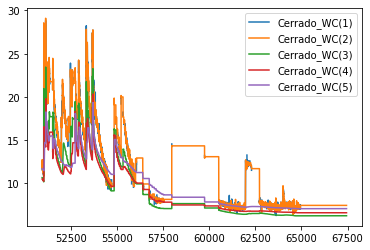

In [15]:
df_2_2020[v].plot()

In [16]:
df = pd.merge(df, df_2_2020, on='TIMESTAMP', how='outer')

In [17]:
df[['TIMESTAMP','wind_dir','wind_dir_compass']]

,TIMESTAMP,wind_dir,wind_dir_compass
0,2020-01-01 07:00:00,256.551,31.651
1,2020-01-01 07:30:00,252.850,27.950
2,2020-01-01 08:00:00,232.333,7.433
3,2020-01-01 08:30:00,217.488,352.588
4,2020-01-01 09:00:00,206.447,341.547
...,...,...,...
17563,2020-12-31 21:30:00,NaN,NaN
17564,2020-12-31 22:00:00,NaN,NaN
17565,2020-12-31 22:30:00,NaN,NaN
17566,2020-12-31 23:00:00,NaN,NaN


In [18]:
df['air_temperature'] = df['air_temperature']-273.15

In [19]:
df = pd.merge(df, evi_df, on='TIMESTAMP', how='inner')

In [20]:
df.loc[df['TIMESTAMP'].dt.month.isin([1,2,12]), 'Season'] = 'Summer'
df.loc[df['TIMESTAMP'].dt.month.isin([3,4,5]), 'Season'] = 'Autumn'
df.loc[df['TIMESTAMP'].dt.month.isin([6,7,8]), 'Season'] = 'Winter'
df.loc[df['TIMESTAMP'].dt.month.isin([9,10,11]), 'Season'] = 'Spring'

In [21]:
df = df.loc[df['flag_basic']==True]
df2 = df.loc[df['flag_full']==True]
df_r = df.loc[(df['flag_basic']==True)&
              (df['flag_full']==False)]

C:\Users\Alex\anaconda3\envs\Masters\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Alex\anaconda3\envs\Masters\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Alex\anaconda3\envs\Masters\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Alex\anaconda3\envs\Masters\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


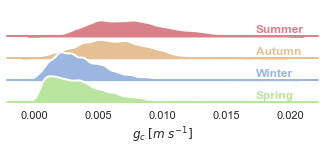

In [22]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

colors = ['#d98088','#e6c095','#9bb7e0','#b9e69c']

#summer, autumn, winter, spring
# colors = ['#b84f51','#c98806','#6cc9e6','#9fc468']
my_palette = sns.color_palette(colors)

pal = sns.cubehelix_palette(6, rot=-.25, light=.7)
g = sns.FacetGrid(df.loc[df['flag_basic']==True], row="Season", hue="Season", aspect=10, height=0.5, palette=my_palette)

g.map(sns.kdeplot, 'gc',
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

g.map(sns.kdeplot, "gc", clip_on=False, color="w", lw=2, bw_adjust=.5)

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0.8, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "gc")

g.figure.subplots_adjust(hspace=-.25)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.set_xlabels('$g_c \; [m \; s^{-1}]$')
g.despine(bottom=True, left=True)
# g.set(xlim=(0,0.017))
sns.set_theme()

# g.savefig(final_imgFolder/'gc-density_allseasons.png', dpi=300)

In [23]:
df.columns

Index(['index_x', 'TIMESTAMP', 'date', 'time', 'H', 'qc_H', 'LE', 'qc_LE',
       'co2_flux', 'H_strg',
       ...
       'Cerrado_WC(1)', 'Cerrado_WC(2)', 'Cerrado_WC(3)', 'Cerrado_WC(4)',
       'Cerrado_WC(5)', 'k15_evi', 'k15_evi_acc_n', 'k15_evi_rej_n',
       'evi_radius_median', 'evi_radius_mean'],
      dtype='object', length=108)

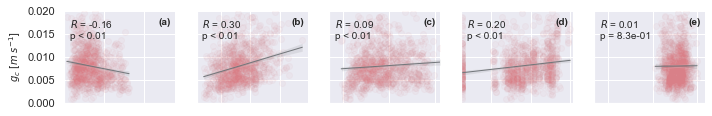

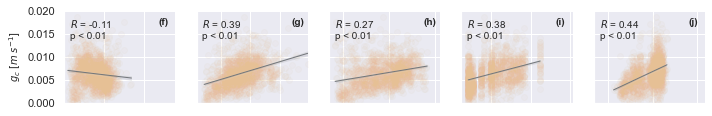

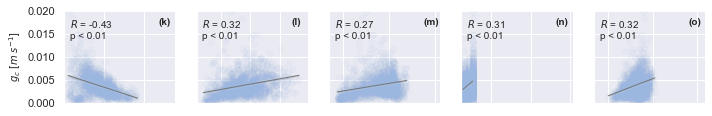

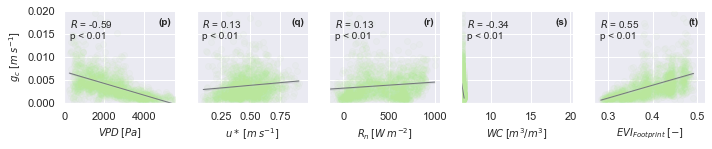

In [24]:
colors = ['#d98088','#e6c095','#9bb7e0','#b9e69c']
variables = ['VPD','u*', 'Rn_Avg','Cerrado_WC(3)','k15_evi']

min_var = [df[v].min() for v in variables]
max_var = [df[v].max() for v in variables]

minmax_var = {}
for v, mi, ma in zip(variables, min_var, max_var):
    minmax_var[v] = [mi, ma]

label_list = [('a','b','c','d', 'e'),
              ('f','g','h','i','j'),
              ('k','l','m', 'n', 'o'),
              ('p','q','r','s','t')]
    
for i,b in enumerate(zip(df['Season'].unique(), label_list)):
    season = b[0]
    label_f = b[1]
    g = sns.PairGrid(data=df.loc[
                                   (df['gc'].notnull())&
                                    (df['VPD'].notnull())&
                                    (df['u*'].notnull())&
                                    (df['Cerrado_WC(3)'].notnull())&
                                    (df['Rn_Avg'].notnull())&
                                    (df['Season']==season)],
                     y_vars=['gc'],
                     x_vars=variables,
                     aspect=1.0, height=2
                    )

    def corrfunc(x, y, **kws):
    #     print(x,y)
        # r, p = scipy.stats.pearsonr(x, y)
        slope, intercept, r, p, std_err = scipy.stats.linregress(x, y)
    #     print(r)
        ax = plt.gca()
        if p < 0.01:
            ax.annotate("$R$ = {:.2f}\np < 0.01".format(r),
                        xy=(0.05, 0.70), xycoords=ax.transAxes, fontsize=10)
        else:
            ax.annotate("$R$ = {:.2f}\np = {:.1e}".format(r,p),
                        xy=(0.05, 0.70), xycoords=ax.transAxes, fontsize=10)
        ax.set_xlim((minmax_var[x.name][0], minmax_var[x.name][1]))
        ax.set_ylim((0, 0.02))
        
    for ax, letter in zip(g.axes.ravel(),label_f):
        ax.annotate(f'({letter})', xy=(0.85,0.85),fontweight='bold',fontsize=10, xycoords=ax.transAxes)

        
        
    g.map_offdiag(sns.regplot, order=1, color=colors[i],
                  line_kws={"color": "#73777B", 'linewidth':'1'}, 
                  scatter_kws={'alpha':0.05})
    g.map_offdiag(corrfunc)
    # g.set_xticklabels(size=12)

    fontsize = 10
    if season == 'Spring':
        g.axes[0,0].set_ylabel('$g_c \; [m \; s^{-1}]$', fontsize=fontsize)
        
        g.axes[0,0].set_xlabel('$VPD \: [Pa]$', fontsize=fontsize)
        g.axes[0,1].set_xlabel('$u* \: [m\: s^{-1}]$', fontsize=fontsize)
        g.axes[0,2].set_xlabel('$R_n \: [W \: m^{-2}]$', fontsize=fontsize)
        g.axes[0,3].set_xlabel('$WC \: [m^3/m^3]$', fontsize=fontsize)
        g.axes[0,4].set_xlabel('$EVI_{Footprint} \: [-]$', fontsize=fontsize)
        
        # g.tight_layout()

    else:
        g.set(xticklabels=[])
        g.axes[0,0].set_ylabel('$g_c \; [m \; s^{-1}]$', fontsize=fontsize)
        g.axes[0,0].set_xlabel('', fontsize=14)
        g.axes[0,1].set_xlabel('', fontsize=14)
        g.axes[0,2].set_xlabel('', fontsize=14)
        g.axes[0,3].set_xlabel('', fontsize=14)  
        g.axes[0,4].set_xlabel('', fontsize=14)  

        # g.tight_layout()
    # break
    # g.savefig(final_imgFolder/'Outros'/f'gc-hourlyVariables-{season}.png', dpi=300)

In [25]:
variables

['VPD', 'u*', 'Rn_Avg', 'Cerrado_WC(3)', 'k15_evi']

In [26]:
variables2 = ['VPD','Cerrado_WC(3)','u*','Rn_Avg','k15_evi']

In [27]:
rf_variables = variables2 + ['Season','gc']

df_rf_h = df2[rf_variables+['TIMESTAMP']].dropna()
# mi_variables = variables + ['k15_evi']

In [28]:
df_rf = df[rf_variables].dropna()
df_rf2 = df2[rf_variables].dropna()

df_rf_r = df_r[rf_variables].dropna()

# df_test = df[variables2+['TIMESTAMP','gc']].dropna()
# df_test2 = df2[variables2+['TIMESTAMP','gc']].dropna()
# df_mi = df[mi_variables+['Season','gc']].dropna()

In [29]:
# df_rf_t = pd.DataFrame(rf_test)
# df_rf_t2 = pd.DataFrame(rf_test2)

In [30]:
# colors=['#E78AC3','#BCBD22','#00d9ff','#9147FF']

# fig, ax = plt.subplots(ncols=2, figsize=(7,2.5), dpi=300, sharey=True)

# labels = ['Summer', 'Autumn', 'Winter', 'Spring']
# x = np.arange(0,len(labels)*1.5,1.5)
# # x = np.linspace()

# width=0

# for n2,(i, row) in enumerate(df_rf_t.T.iterrows()):
#     # print(i)
#     v = 0
#     for n,j in enumerate(row):
#         # print(j)
#         b = ax[0].bar(x=i, height=j, bottom=v, color=colors[n])
#         ax[0].bar_label(b, label_type='center', fmt='%.0f%%', fontsize='10')
#         v += j

# for n2,(i, row) in enumerate(df_rf_t2.T.iterrows()):
#     # print(i)
#     v = 0
#     for n,j in enumerate(row):
#         # print(j)
#         b = ax[1].bar(x=i, height=j, bottom=v, color=colors[n])
#         ax[1].bar_label(b, label_type='center', fmt='%.0f%%', fontsize='10')
#         v += j

# l = ['(a)', '(b)']
# for i in range(2):
#     ax[i].set_ylim((0,101))
#     # ax[i].set_
#     # ax[i].set_xticks(x, labels)
#     ax[i].annotate(f'{l[i]}', xy=(3, 92), color='white', fontweight='bold')
    
# handles = [plt.Rectangle((0,0), 1,1, color=i) for i in colors]
# labels = ['VPD', 'u*','Rn','$EVI_{footprint}$']

# ax[0].legend(handles, labels, frameon=True, ncol=4, bbox_to_anchor=(0.28,1,0.5,.11))
# # fig.tight_layout()

In [31]:
for s in df_rf['Season'].unique():
    print(s)
    print(df_rf.loc[df_rf['Season']==s, ['u*','VPD']].median())

Summer
u*        0.393536
VPD    1222.760000
dtype: float64
Autumn
u*        0.408839
VPD    1577.630000
dtype: float64
Winter
u*        0.43461
VPD    1761.48000
dtype: float64
Spring
u*        0.463334
VPD    2300.515000
dtype: float64


In [32]:

print('Sem footprint filter')
rfr = RandomForestRegressor(random_state=2,max_depth=30)
rfr.fit(X=df_rf[variables2], y=df_rf['gc'])

result = permutation_importance(rfr, df_rf[rf_variables[:-2]], df_rf['gc'], n_repeats=10)


for variable, mean, std in zip(df_rf[rf_variables[:-2]].columns, result['importances_mean'], result['importances_std']):
    # print(variable,'\t', mean, std)
    total = result['importances_mean'].sum()
    print(f'{variable}:\t: {mean/total:.02f},\t {std:.02f}')
    # rf_results_nok15[s][variable] = mean/total
    
print('Com footprint filter')
rfr = RandomForestRegressor(random_state=2,max_depth=30)
rfr.fit(X=df_rf2[variables2], y=df_rf2['gc'])

result = permutation_importance(rfr, df_rf2[rf_variables[:-2]], df_rf2['gc'], n_repeats=10)


for variable, mean, std in zip(df_rf2[rf_variables[:-2]].columns, result['importances_mean'], result['importances_std']):
    # print(variable,'\t', mean, std)
    total = result['importances_mean'].sum()
    print(f'{variable}:\t: {mean/total:.02f},\t {std:.02f}')
    # rf_results_nok15[s][variable] = mean/total

Sem footprint filter
VPD:	: 0.26,	 0.01
Cerrado_WC(3):	: 0.32,	 0.00
u*:	: 0.11,	 0.01
Rn_Avg:	: 0.18,	 0.01
k15_evi:	: 0.13,	 0.01
Com footprint filter
VPD:	: 0.23,	 0.01
Cerrado_WC(3):	: 0.35,	 0.02
u*:	: 0.11,	 0.01
Rn_Avg:	: 0.21,	 0.02
k15_evi:	: 0.09,	 0.01


In [33]:
rf_results_nok15 = {}

for s in df['Season'].unique():
    print(s)
    df_season = df_rf.loc[df_rf['Season']==s]
    
    rfr = RandomForestRegressor(random_state=2,max_depth=30)
    rfr.fit(X=df_season[variables2], y=df_season['gc'])
    
    result = permutation_importance(rfr, df_season[rf_variables[:-2]], df_season['gc'], n_repeats=10)
    rf_results_nok15[s] = {}

    
    for variable, mean, std in zip(df_season[rf_variables[:-2]].columns, result['importances_mean'], result['importances_std']):
        # print(variable,'\t', mean, std)
        total = result['importances_mean'].sum()
        print(f'{variable}:\t: {mean/total:.02f},\t {std:.02f}')
        rf_results_nok15[s][variable] = mean/total

    print()
    

Summer
VPD:	: 0.20,	 0.01
Cerrado_WC(3):	: 0.22,	 0.02
u*:	: 0.18,	 0.02
Rn_Avg:	: 0.23,	 0.02
k15_evi:	: 0.17,	 0.02

Autumn
VPD:	: 0.20,	 0.01
Cerrado_WC(3):	: 0.11,	 0.01
u*:	: 0.21,	 0.02
Rn_Avg:	: 0.22,	 0.01
k15_evi:	: 0.27,	 0.03

Winter
VPD:	: 0.44,	 0.05
Cerrado_WC(3):	: 0.08,	 0.02
u*:	: 0.07,	 0.01
Rn_Avg:	: 0.33,	 0.05
k15_evi:	: 0.08,	 0.01

Spring
VPD:	: 0.45,	 0.04
Cerrado_WC(3):	: 0.03,	 0.01
u*:	: 0.09,	 0.01
Rn_Avg:	: 0.17,	 0.02
k15_evi:	: 0.27,	 0.02



In [34]:
rfr = RandomForestRegressor(random_state=2, max_depth=30)
rfr.fit(X=df_rf[variables2], y=df_rf['gc'])

result = permutation_importance(rfr, df_rf[rf_variables[:-2]], df_rf['gc'], n_repeats=10)
rf_results_nok15['All Seasons'] = {}

for variable, mean, std in zip(df_rf[rf_variables[:-2]].columns, result['importances_mean'], result['importances_std']):
    total = result['importances_mean'].sum()
    print(f'{variable}:\t: {mean/total:.02f},\t {std:.02f}')
    rf_results_nok15['All Seasons'][variable] = mean/total

VPD:	: 0.26,	 0.02
Cerrado_WC(3):	: 0.32,	 0.02
u*:	: 0.11,	 0.01
Rn_Avg:	: 0.18,	 0.01
k15_evi:	: 0.13,	 0.00


In [35]:
rf_results = {}
for s in df['Season'].unique():
    print(s)
    # rf_results[s] = {}
    df_season = df_rf2.loc[df_rf2['Season']==s]
    
    rfr = RandomForestRegressor(random_state=2,max_depth=30)
    rfr.fit(X=df_season[variables2], y=df_season['gc'])
    
    result = permutation_importance(rfr, df_season[rf_variables[:-2]], df_season['gc'], n_repeats=10)
    r = []
    rf_results[s] = {}
    for variable, mean, std in zip(df_season[rf_variables[:-2]].columns, result['importances_mean'], result['importances_std']):
        # print(variable,'\t', mean, std)
        total = result['importances_mean'].sum()
        print(f'{variable}:\t: {mean/total:.02f},\t {std:.02f}')
        # r.append(mean/total)
        rf_results[s][variable] = mean/total
    print()
    

Summer
VPD:	: 0.29,	 0.01
Cerrado_WC(3):	: 0.15,	 0.02
u*:	: 0.16,	 0.01
Rn_Avg:	: 0.31,	 0.02
k15_evi:	: 0.09,	 0.01

Autumn
VPD:	: 0.22,	 0.03
Cerrado_WC(3):	: 0.10,	 0.01
u*:	: 0.22,	 0.03
Rn_Avg:	: 0.26,	 0.02
k15_evi:	: 0.19,	 0.02

Winter
VPD:	: 0.37,	 0.04
Cerrado_WC(3):	: 0.11,	 0.03
u*:	: 0.08,	 0.02
Rn_Avg:	: 0.40,	 0.06
k15_evi:	: 0.03,	 0.00

Spring
VPD:	: 0.42,	 0.03
Cerrado_WC(3):	: 0.03,	 0.01
u*:	: 0.08,	 0.01
Rn_Avg:	: 0.20,	 0.02
k15_evi:	: 0.27,	 0.04



In [36]:
rfr = RandomForestRegressor(random_state=2, max_depth=30)
rfr.fit(X=df_rf2[variables2], y=df_rf2['gc'])

result = permutation_importance(rfr, df_rf2[rf_variables[:-2]], df_rf2['gc'], n_repeats=10)

rf_results['All Seasons'] = {}

for variable, mean, std in zip(df_rf2[rf_variables[:-2]].columns, result['importances_mean'], result['importances_std']):
    # print(variable,'\t', mean, std)
    total = result['importances_mean'].sum()
    print(f'{variable}:\t: {mean/total:.02f},\t {std:.02f}')
    # r.append(mean/total)
    rf_results['All Seasons'][variable] = mean/total

VPD:	: 0.24,	 0.01
Cerrado_WC(3):	: 0.35,	 0.02
u*:	: 0.11,	 0.01
Rn_Avg:	: 0.21,	 0.01
k15_evi:	: 0.09,	 0.00


In [37]:
df_t = pd.DataFrame(rf_results)
df_t2 = pd.DataFrame(rf_results_nok15)

In [38]:
df_diff = (df_t - df_t2)/df_t2

In [39]:
for s in df['Season'].unique():
    print(s)
    df_season = df_rf_r.loc[df_rf_r['Season']==s]
    
    rfr = RandomForestRegressor(random_state=2,max_depth=30)
    rfr.fit(X=df_season[variables2], y=df_season['gc'])
    
    result = permutation_importance(rfr, df_season[rf_variables[:-2]], df_season['gc'], n_repeats=10)
    for variable, mean, std in zip(df_season[rf_variables[:-2]].columns, result['importances_mean'], result['importances_std']):
        # print(variable,'\t', mean, std)
        total = result['importances_mean'].sum()
        print(f'{variable}:\t: {mean/total:.02f},\t {std:.02f}')
    print()

Summer
VPD:	: 0.21,	 0.02
Cerrado_WC(3):	: 0.22,	 0.02
u*:	: 0.22,	 0.03
Rn_Avg:	: 0.15,	 0.01
k15_evi:	: 0.19,	 0.03

Autumn
VPD:	: 0.08,	 0.01
Cerrado_WC(3):	: 0.07,	 0.01
u*:	: 0.23,	 0.03
Rn_Avg:	: 0.16,	 0.03
k15_evi:	: 0.46,	 0.04

Winter
VPD:	: 0.39,	 0.04
Cerrado_WC(3):	: 0.08,	 0.01
u*:	: 0.07,	 0.01
Rn_Avg:	: 0.32,	 0.05
k15_evi:	: 0.15,	 0.02

Spring
VPD:	: 0.36,	 0.04
Cerrado_WC(3):	: 0.01,	 0.00
u*:	: 0.13,	 0.02
Rn_Avg:	: 0.08,	 0.02
k15_evi:	: 0.43,	 0.06



In [40]:
for s in df['Season'].unique():
    print(s)
    df_season = df_rf2.loc[df_rf2['Season']==s]
    
    rfr = RandomForestRegressor(random_state=2,max_depth=30)
    rfr.fit(X=df_season[variables2], y=df_season['gc'])
    
    result = permutation_importance(rfr, df_season[rf_variables[:-2]], df_season['gc'], n_repeats=10)
    for variable, mean, std in zip(df_season[rf_variables[:-2]].columns, result['importances_mean'], result['importances_std']):
        # print(variable,'\t', mean, std)
        total = result['importances_mean'].sum()
        print(f'{variable}:\t: {mean/total:.02f},\t {std:.02f}')
    print()

Summer
VPD:	: 0.29,	 0.03
Cerrado_WC(3):	: 0.15,	 0.01
u*:	: 0.16,	 0.01
Rn_Avg:	: 0.31,	 0.03
k15_evi:	: 0.09,	 0.01

Autumn
VPD:	: 0.22,	 0.03
Cerrado_WC(3):	: 0.10,	 0.01
u*:	: 0.22,	 0.02
Rn_Avg:	: 0.26,	 0.02
k15_evi:	: 0.19,	 0.02

Winter
VPD:	: 0.38,	 0.05
Cerrado_WC(3):	: 0.10,	 0.03
u*:	: 0.09,	 0.01
Rn_Avg:	: 0.40,	 0.04
k15_evi:	: 0.03,	 0.00

Spring
VPD:	: 0.43,	 0.03
Cerrado_WC(3):	: 0.03,	 0.00
u*:	: 0.08,	 0.01
Rn_Avg:	: 0.20,	 0.02
k15_evi:	: 0.27,	 0.02



In [41]:
rf_results

{'Summer': {'VPD': 0.28773686422371886,
  'Cerrado_WC(3)': 0.1485497170127706,
  'u*': 0.15871790151029638,
  'Rn_Avg': 0.31059408715962566,
  'k15_evi': 0.09440143009358834},
 'Autumn': {'VPD': 0.22448118797552258,
  'Cerrado_WC(3)': 0.10029957870229567,
  'u*': 0.2242730468535428,
  'Rn_Avg': 0.263592775648209,
  'k15_evi': 0.18735341082042994},
 'Winter': {'VPD': 0.3736954472000191,
  'Cerrado_WC(3)': 0.10566779600192308,
  'u*': 0.08454180692102443,
  'Rn_Avg': 0.4043486095942813,
  'k15_evi': 0.03174634028275211},
 'Spring': {'VPD': 0.41994774474541824,
  'Cerrado_WC(3)': 0.026880525006993332,
  'u*': 0.08290991998265089,
  'Rn_Avg': 0.20471566596234791,
  'k15_evi': 0.26554614430258966},
 'All Seasons': {'VPD': 0.23747589552048004,
  'Cerrado_WC(3)': 0.35391725020818027,
  'u*': 0.11047770748896996,
  'Rn_Avg': 0.20709693930271067,
  'k15_evi': 0.09103220747965904}}

In [42]:
a = []
for s in rf_results.keys():
    print(rf_results[s])
    t = []
    for j in rf_results[s].keys():
        t.append(rf_results[s][j])
    print(t)
    a.append(t)
    
    
a_nok15 = []
for s in rf_results_nok15.keys():
    print(rf_results_nok15[s])
    t = []
    for j in rf_results_nok15[s].keys():
        t.append(rf_results_nok15[s][j])
    print(t)
    a_nok15.append(t)

{'VPD': 0.28773686422371886, 'Cerrado_WC(3)': 0.1485497170127706, 'u*': 0.15871790151029638, 'Rn_Avg': 0.31059408715962566, 'k15_evi': 0.09440143009358834}
[0.28773686422371886, 0.1485497170127706, 0.15871790151029638, 0.31059408715962566, 0.09440143009358834]
{'VPD': 0.22448118797552258, 'Cerrado_WC(3)': 0.10029957870229567, 'u*': 0.2242730468535428, 'Rn_Avg': 0.263592775648209, 'k15_evi': 0.18735341082042994}
[0.22448118797552258, 0.10029957870229567, 0.2242730468535428, 0.263592775648209, 0.18735341082042994]
{'VPD': 0.3736954472000191, 'Cerrado_WC(3)': 0.10566779600192308, 'u*': 0.08454180692102443, 'Rn_Avg': 0.4043486095942813, 'k15_evi': 0.03174634028275211}
[0.3736954472000191, 0.10566779600192308, 0.08454180692102443, 0.4043486095942813, 0.03174634028275211]
{'VPD': 0.41994774474541824, 'Cerrado_WC(3)': 0.026880525006993332, 'u*': 0.08290991998265089, 'Rn_Avg': 0.20471566596234791, 'k15_evi': 0.26554614430258966}
[0.41994774474541824, 0.026880525006993332, 0.08290991998265089, 

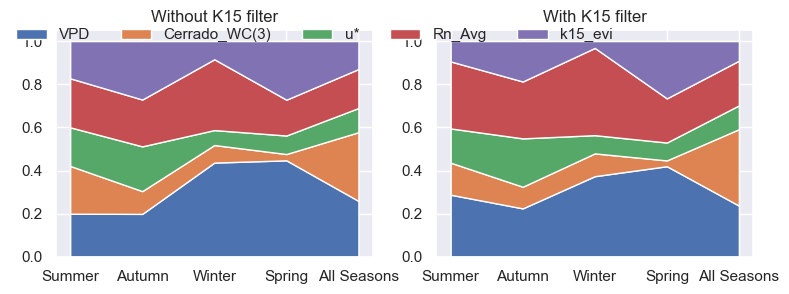

In [43]:
fig, ax = plt.subplots(ncols=2,figsize=(9,3), dpi=100)
ax[0].stackplot([s for s in rf_results_nok15.keys()],np.array(a_nok15).T, 
              labels=[j for j in rf_results_nok15['Summer'].keys()],
              baseline='zero', 
                # colors=['#E78AC3','#BCBD22','#00d9ff','#9147FF'],
                alpha=1)

ax[0].set_title('Without K15 filter')

ax[1].stackplot([s for s in rf_results.keys()],np.array(a).T, 
                labels=[j for j in rf_results['Summer'].keys()], alpha=1,
                # colors=['#E78AC3','#BCBD22','#00d9ff','#9147FF']
               )

ax[1].set_title('With K15 filter')
plt.legend(frameon=False, ncol=5, bbox_to_anchor=(0, 1,0.6,0.07))

# fig.savefig(final_imgFolder/'PRELIMINAR_rf_importance.png')
# plt.stackplot([s for s in rf_results.keys()],np.array(a).T, labels=[j for j in rf_results['Summer'].keys()], alpha=0.3)
# plt.legend(frameon=False, ncol=4, bbox_to_anchor=(0, 1,1,0.1))

In [44]:
df_t

,Summer,Autumn,Winter,Spring,All Seasons
VPD,0.287737,0.224481,0.373695,0.419948,0.237476
Cerrado_WC(3),0.148550,0.100300,0.105668,0.026881,0.353917
u*,0.158718,0.224273,0.084542,0.082910,0.110478
Rn_Avg,0.310594,0.263593,0.404349,0.204716,0.207097
k15_evi,0.094401,0.187353,0.031746,0.265546,0.091032


In [45]:
df_t2 #without k15 filter

,Summer,Autumn,Winter,Spring,All Seasons
VPD,0.199886,0.198980,0.436726,0.447191,0.259218
Cerrado_WC(3),0.221321,0.105491,0.081414,0.029178,0.318305
u*,0.178989,0.207554,0.069325,0.085921,0.112229
Rn_Avg,0.227094,0.217036,0.328222,0.166015,0.180464
k15_evi,0.172709,0.270939,0.084313,0.271695,0.129783


In [46]:
np.array(a_nok15).T

array([[0.19988631, 0.19898011, 0.43672588, 0.44719082, 0.25921826],
       [0.22132126, 0.10549094, 0.08141416, 0.02917813, 0.3183054 ],
       [0.17898889, 0.20755351, 0.06932457, 0.08592108, 0.1122294 ],
       [0.22709437, 0.21703605, 0.32822218, 0.16601506, 0.18046393],
       [0.17270917, 0.2709394 , 0.08431322, 0.27169491, 0.12978301]])

In [47]:
np.array(a).T

array([[0.28773686, 0.22448119, 0.37369545, 0.41994774, 0.2374759 ],
       [0.14854972, 0.10029958, 0.1056678 , 0.02688053, 0.35391725],
       [0.1587179 , 0.22427305, 0.08454181, 0.08290992, 0.11047771],
       [0.31059409, 0.26359278, 0.40434861, 0.20471567, 0.20709694],
       [0.09440143, 0.18735341, 0.03174634, 0.26554614, 0.09103221]])

In [48]:
rel_diff = (np.array(a_nok15).T - np.array(a).T)
rel_diff

array([[-0.08785055, -0.02550108,  0.06303043,  0.02724307,  0.02174237],
       [ 0.07277154,  0.00519136, -0.02425364,  0.00229761, -0.03561185],
       [ 0.02027098, -0.01671954, -0.01521724,  0.00301116,  0.00175169],
       [-0.08349972, -0.04655673, -0.07612643, -0.0387006 , -0.02663301],
       [ 0.07830774,  0.08358599,  0.05256688,  0.00614876,  0.0387508 ]])

In [49]:
df_diff

,Summer,Autumn,Winter,Spring,All Seasons
VPD,0.439503,0.128159,-0.144325,-0.060920,-0.083877
Cerrado_WC(3),-0.328805,-0.049211,0.297904,-0.078744,0.111880
u*,-0.113253,0.080555,0.219507,-0.035046,-0.015608
Rn_Avg,0.367687,0.214512,0.231936,0.233115,0.147581
k15_evi,-0.453408,-0.308504,-0.623471,-0.022631,-0.298581


<AxesSubplot:>

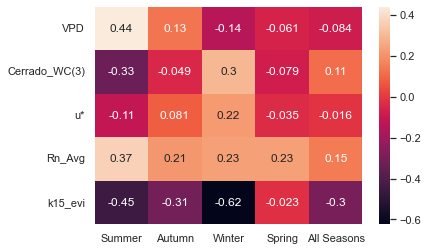

In [50]:
sns.heatmap(df_diff, annot=True)

In [51]:
df_diff.reset_index()

,index,Summer,Autumn,Winter,Spring,All Seasons
0,VPD,0.439503,0.128159,-0.144325,-0.060920,-0.083877
1,Cerrado_WC(3),-0.328805,-0.049211,0.297904,-0.078744,0.111880
2,u*,-0.113253,0.080555,0.219507,-0.035046,-0.015608
3,Rn_Avg,0.367687,0.214512,0.231936,0.233115,0.147581
4,k15_evi,-0.453408,-0.308504,-0.623471,-0.022631,-0.298581


In [52]:
df_diff2 = df_diff.T.reset_index().rename(columns={'index': 'Season'})

In [53]:
df_diff2

,Season,VPD,Cerrado_WC(3),u*,Rn_Avg,k15_evi
0,Summer,0.439503,-0.328805,-0.113253,0.367687,-0.453408
1,Autumn,0.128159,-0.049211,0.080555,0.214512,-0.308504
2,Winter,-0.144325,0.297904,0.219507,0.231936,-0.623471
3,Spring,-0.060920,-0.078744,-0.035046,0.233115,-0.022631
4,All Seasons,-0.083877,0.111880,-0.015608,0.147581,-0.298581


In [54]:
df_diff.reset_index()

,index,Summer,Autumn,Winter,Spring,All Seasons
0,VPD,0.439503,0.128159,-0.144325,-0.060920,-0.083877
1,Cerrado_WC(3),-0.328805,-0.049211,0.297904,-0.078744,0.111880
2,u*,-0.113253,0.080555,0.219507,-0.035046,-0.015608
3,Rn_Avg,0.367687,0.214512,0.231936,0.233115,0.147581
4,k15_evi,-0.453408,-0.308504,-0.623471,-0.022631,-0.298581


In [55]:
df_diff3 = pd.melt(df_diff.reset_index(), id_vars='index', var_name='season',value_name='value')
df_diff3['value'] = df_diff3['value']*100

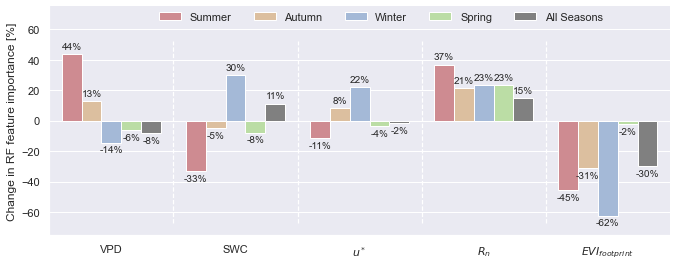

In [59]:

sns.set_theme(style="darkgrid")
colors = ['#d98088','#e6c095','#9bb7e0','#b9e69c','grey']
my_palette = sns.color_palette(colors)

g=sns.catplot(x='index', y='value', hue='season', kind='bar', data=df_diff3, palette=my_palette,aspect=2.4, height=4)
plt.ylim((-75,75))

sns.move_legend(g, "upper center", ncol=5, title=None, frameon=False, bbox_to_anchor=(0.5,0.97))
ax = g.facet_axis(0, 0)

g.set_ylabels('Change in RF feature importance [%]')
g.set_xlabels('')
g.set_xticklabels(labels=['VPD','SWC', '$u^*$','$R_n$','$EVI_{footprint}$'])
for i in range(4):
    ax.axvline(x=0.5+i, ymin=0.05, ymax=0.85, linestyle='--', color='white', linewidth=1.2)    

# ax.axhline(y=0, color='white')

for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=3, fontsize=10)
    
#g.savefig(final_imgFolder/'rf_importanceChange_v2.png', dpi=300)

In [57]:
final_imgFolder

WindowsPath('G:/Meu Drive/USP-Mestrado/Masters-Data/Imgs/Final')

In [56]:
#EAEAF2